In [1]:
import requests
import bs4
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import acquire as a 
import prepare as p

#### Question 1: Spam Data

 - Load the spam data set.
 - Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
 - Is there any overlap in the bigrams for the spam data and the ham data?
 - Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [3]:
df = pd.read_csv('spam_clean.csv') ## loading the spam vs ham text message set
print(f'The shape of our dataframe: {df.shape}\n')
df.head() ## previewing data frame 

The shape of our dataframe: (5572, 2)



,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.label.value_counts()  ## looking at label value counts

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))  ## making a string of the words for each category

#### Explore Ham

In [6]:
## creating panda's series that contain the frequency for ham spam and all words

ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [7]:
## creating word count dataframe with ham spam and all columns

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431



#### n-grams
##### bigram: combinations of 2 words

##### Represent text as combinations of 2 words

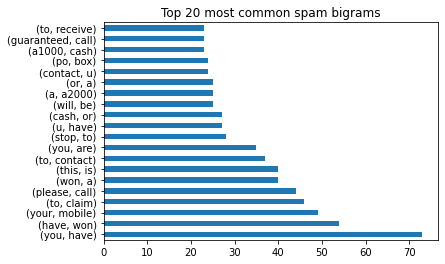

In [8]:
## creating bigrams for spam words and looking at the top 20 

pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20).plot.barh()
plt.title('Top 20 most common spam bigrams')
plt.show()

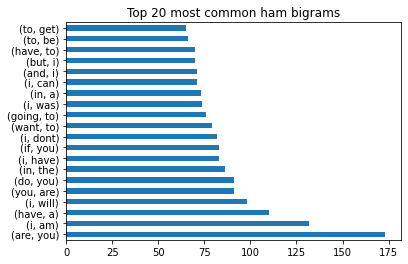

In [9]:
## creating bigrams for ham words and looking at the top 20

pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20).plot.barh()
plt.title('Top 20 most common ham bigrams')
plt.show()

#### Bigram Bar Graph Takeaways

The only overlap I can see from the spam bigrams and the ham bigrams are overlap between a common phrase. 

For exmample the only overlap I see is the bigram 'you, are'

In [10]:
ham_words[:100] ## looking at first 100 characters in ham words

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore w'

In [11]:
## creating a series for the frequencies of the top 20 ham words

top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20)

top_20_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(you, are)     91
dtype: int64

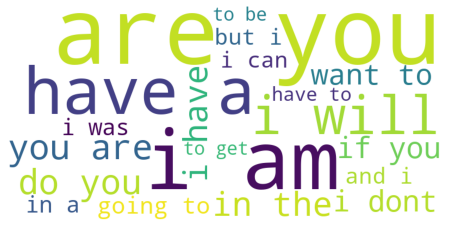

In [12]:
## using list comprehension to creat a dictionary of ham bigrams as a dictionary

data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
## creating a series for the frequencies of the top 20 spam words

top_20_spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20)

top_20_spam_bigrams.head()

(you, have)       73
(have, won)       54
(your, mobile)    49
(to, claim)       46
(please, call)    44
dtype: int64

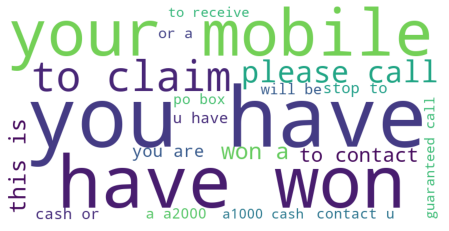

In [14]:
## using list comprehension to creat a dictionary of spam bigrams as a dictionary

data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


#### n-grams
##### trigram: combinations of 3 words

##### Represent text as combinations of 3 words

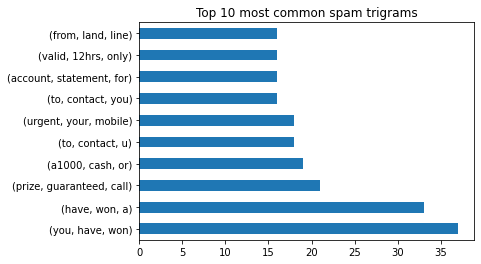

In [15]:
## creating trigrams for spam words and looking at the top 10 

pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam trigrams')
plt.show()

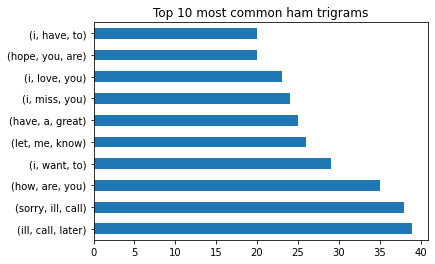

In [16]:
## creating trigrams for spam words and looking at the top 10 

pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham trigrams')
plt.show()

#### Explore the blog articles using the techniques discussed in the exploration lesson.

In [17]:
## making our category list

category_list = ['business', 'technology', 'sports', 'entertainment']

In [18]:
blog_articles = a.get_blog_articles(category_list) ## using our acquire function

blog_articles.head() ## previewing dataframe

,Title,Content,Category
0,\n\nCustomers of banks under moratorium to get...,Finance Minister Nirmala Sitharaman today anno...,business
1,"\n\nApple, Alphabet, Microsoft post combined q...",Three of the world's largest tech companies - ...,business
2,\n\nOld video of people laughing as Bezos talk...,An old video of Amazon Founder Jeff Bezos has ...,business
3,\n\nThis information isn't collected by govt: ...,"Finance Minister Nirmala Sitharaman replied ""t...",business
4,\n\nBanks to remain closed for a total of 15 d...,The banks will remain closed for 15 days in Au...,business


In [19]:
## getting rid of whitespace and \n's
blog_articles['Title'] = blog_articles['Title'].str.strip() 

blog_articles.head() ## quality assurance check

,Title,Content,Category
0,Customers of banks under moratorium to get ₹5 ...,Finance Minister Nirmala Sitharaman today anno...,business
1,"Apple, Alphabet, Microsoft post combined quart...",Three of the world's largest tech companies - ...,business
2,Old video of people laughing as Bezos talks ab...,An old video of Amazon Founder Jeff Bezos has ...,business
3,This information isn't collected by govt: FM o...,"Finance Minister Nirmala Sitharaman replied ""t...",business
4,Banks to remain closed for a total of 15 days ...,The banks will remain closed for 15 days in Au...,business


In [20]:
blog_articles = p.prep_content_columns(blog_articles) ## using our prepare function

blog_articles.head()

,Title,Content,Category,Clean,Stemmed,Lemmatized
0,Customers of banks under moratorium to get ₹5 ...,Finance Minister Nirmala Sitharaman today anno...,business,finance minister nirmala sitharaman today anno...,financ minist nirmala sitharaman today announc...,finance minister nirmala sitharaman today anno...
1,"Apple, Alphabet, Microsoft post combined quart...",Three of the world's largest tech companies - ...,business,three worlds largest tech companies apple goog...,three world largest tech compani appl googl pa...,three world largest tech company apple google ...
2,Old video of people laughing as Bezos talks ab...,An old video of Amazon Founder Jeff Bezos has ...,business,old video amazon founder jeff bezos gone viral...,old video amazon founder jeff bezo gone viral ...,old video amazon founder jeff bezos gone viral...
3,This information isn't collected by govt: FM o...,"Finance Minister Nirmala Sitharaman replied ""t...",business,finance minister nirmala sitharaman replied in...,financ minist nirmala sitharaman repli inform ...,finance minister nirmala sitharaman replied in...
4,Banks to remain closed for a total of 15 days ...,The banks will remain closed for 15 days in Au...,business,banks remain closed 15 days august 2021 includ...,bank remain close 15 day august 2021 includ we...,bank remain closed 15 day august 2021 includin...


In [21]:
## looking at category value counts for the articles

blog_articles.Category.value_counts()

sports           25
entertainment    25
business         24
technology       24
Name: Category, dtype: int64

In [22]:
## making strings of all the words used for each category

entertain_words = ' '.join(blog_articles[blog_articles.Category == 'entertainment'].Clean)
business_words = ' '.join(blog_articles[blog_articles.Category == 'business'].Clean)
sports_words = ' '.join(blog_articles[blog_articles.Category == 'sports'].Clean)
technology_words = ' '.join(blog_articles[blog_articles.Category == 'technology'].Clean)
all_words = ' '.join(blog_articles.Clean)

In [23]:
## making panda series that represent the frequencies of words used in each article 
## category

entertain_freq = pd.Series(entertain_words.split()).value_counts()
business_freq = pd.Series(business_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()
technology_freq = pd.Series(technology_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [24]:
## building our dataframe of word frequencies with our categories as columns

word_counts = pd.concat([entertain_freq, business_freq, 
                         sports_freq, technology_freq, all_freq], 
                        axis=1).fillna(0).astype(int)
word_counts.columns = ['entertainment', 'business', 'sports', 'tech', 'all']
word_counts.head()

,entertainment,business,sports,tech,all
said,25,18,7,16,66
actor,15,0,0,0,15
added,11,5,3,4,23
actress,10,0,0,0,10
porn,7,0,0,0,7


In [25]:
## looking at the most frequently occuring words

word_counts.sort_values('all', ascending=False).head(20)

,entertainment,business,sports,tech,all
said,25,18,7,16,66
olympics,1,0,23,0,24
added,11,5,3,4,23
tokyo,0,0,19,0,19
round,0,0,18,0,18
india,0,9,7,1,17
crore,0,16,0,0,16
actor,15,0,0,0,15
womens,0,0,14,0,14
indian,0,1,11,1,13


In [26]:
word_counts.sort_values(['sports', 'business'], ascending=[True, False]).head(8)

,entertainment,business,sports,tech,all
crore,0,16,0,0,16
companies,0,9,0,2,11
reported,0,7,0,1,8
around,0,6,0,5,11
billion,0,6,0,7,13
bank,0,6,0,2,8
days,1,5,0,1,7
market,0,5,0,4,9


In [27]:
word_counts.sort_values(['tech', 'entertainment'], ascending=[True, False]).head(8)

,entertainment,business,sports,tech,all
actor,15,0,0,0,15
actress,10,0,0,0,10
porn,7,0,0,0,7
film,7,0,0,0,7
dont,7,0,0,0,7
kundras,5,0,0,0,5
want,5,0,1,0,6
im,5,0,0,0,5


In [28]:
word_counts.sort_values(['tech', 'business'], ascending=[True, False]).head(8)

,entertainment,business,sports,tech,all
crore,0,16,0,0,16
august,0,5,0,0,5
shares,0,5,0,0,5
international,0,4,0,0,4
airline,0,4,0,0,4
banks,0,4,0,0,4
ipo,0,4,0,0,4
capacity,0,4,0,0,4


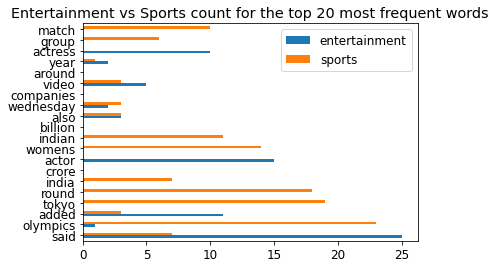

In [29]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['entertainment', 
                                                          'sports']].plot.barh()
plt.title('Entertainment vs Sports count for the top 20 most frequent words')
None

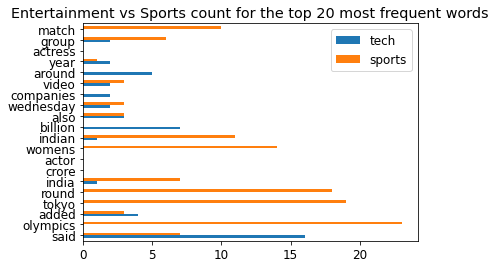

In [30]:
word_counts.sort_values('all', ascending=False).head(20)[['tech', 
                                                          'sports']].plot.barh()
plt.title('Entertainment vs Sports count for the top 20 most frequent words')
None

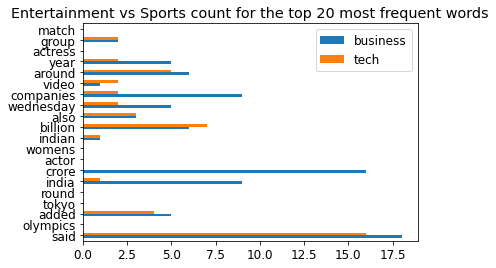

In [31]:
word_counts.sort_values('all', ascending=False).head(20)[['business', 
                                                          'tech']].plot.barh()
plt.title('Entertainment vs Sports count for the top 20 most frequent words')
None

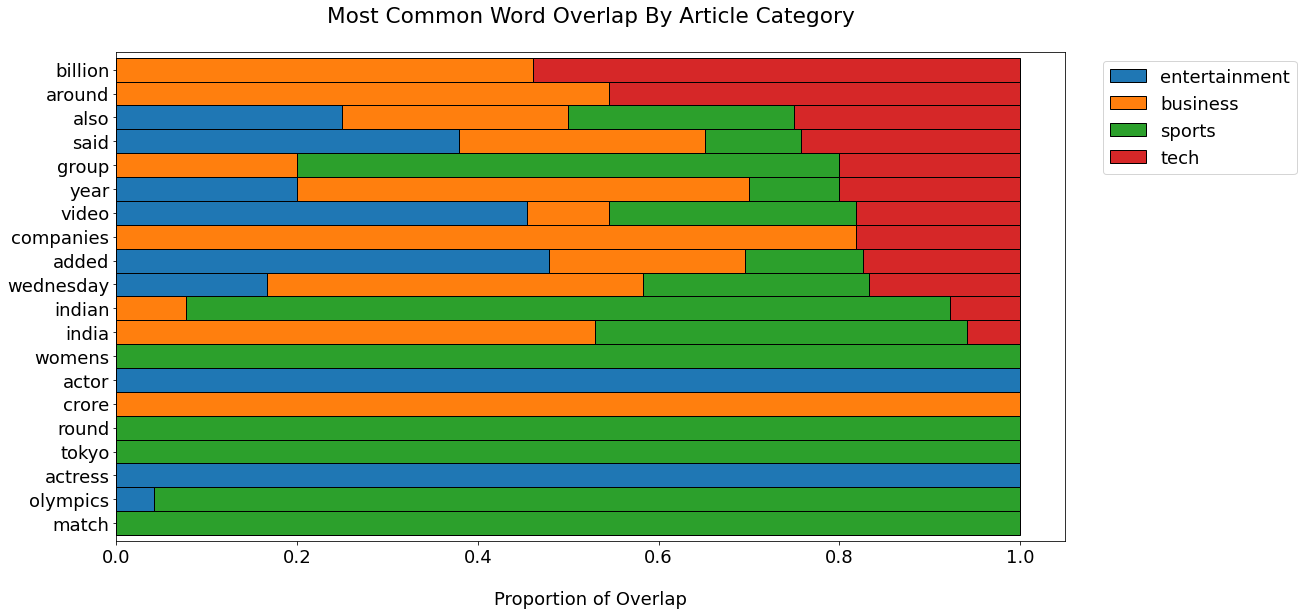

In [32]:
plt.rc('font', size=18)
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='tech')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(17,9)))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Most Common Word Overlap By Article Category\n')
plt.xlabel('\nProportion of Overlap')
plt.show()

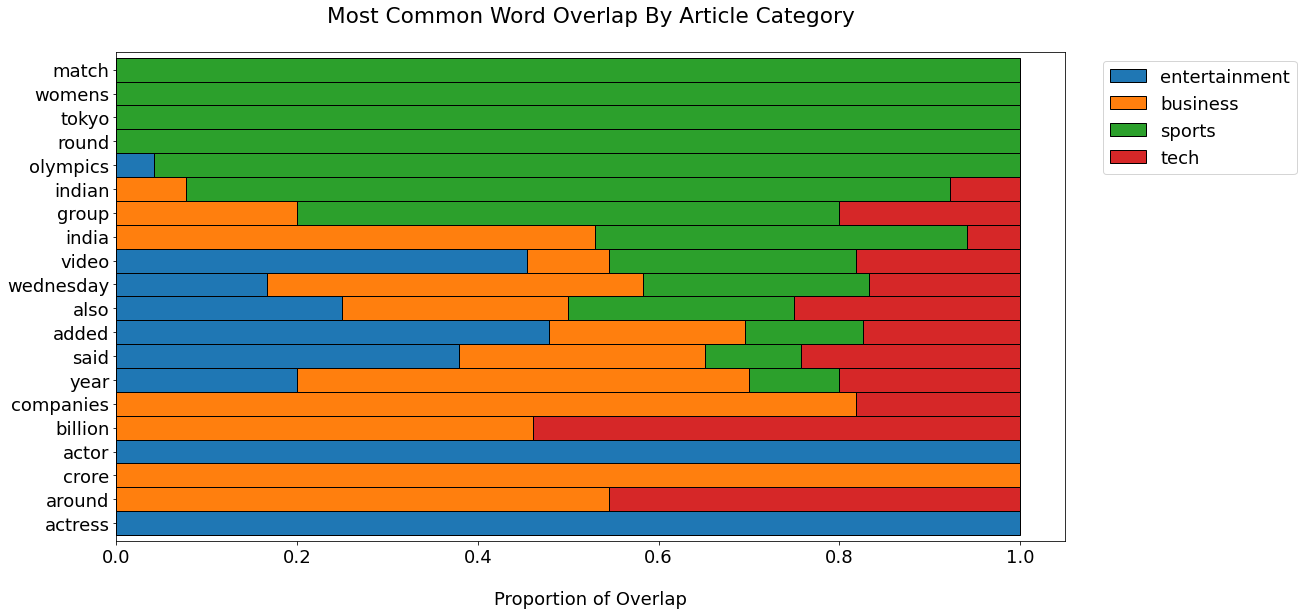

In [33]:
plt.rc('font', size=18)
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='sports')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(17,9)))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Most Common Word Overlap By Article Category\n')
plt.xlabel('\nProportion of Overlap')
None

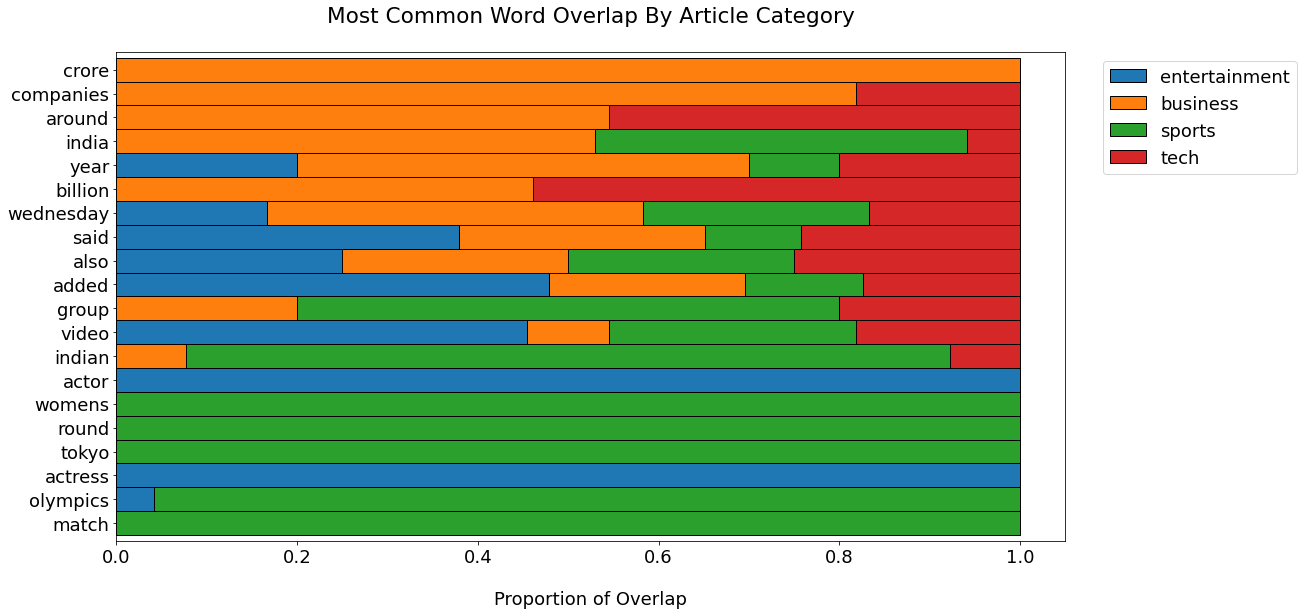

In [34]:
plt.rc('font', size=18)
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='business')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(17,9)))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Most Common Word Overlap By Article Category\n')
plt.xlabel('\nProportion of Overlap')
None

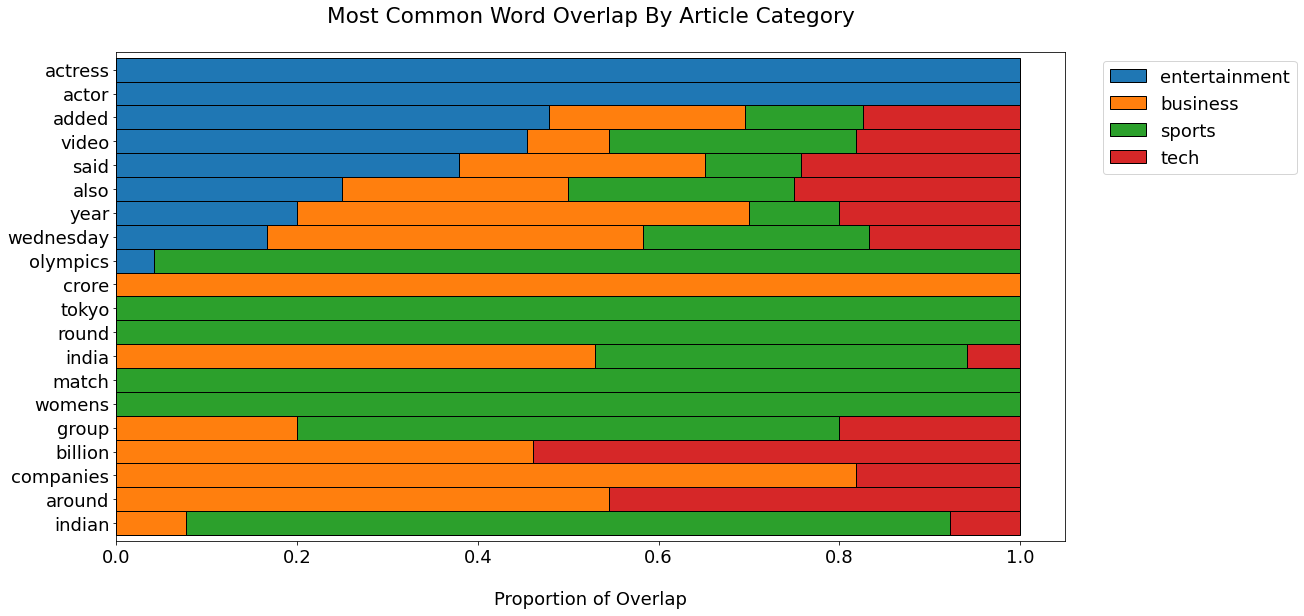

In [35]:
plt.rc('font', size=18)
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='entertainment')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(17,9)))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Most Common Word Overlap By Article Category\n')
plt.xlabel('\nProportion of Overlap')
None

#### Bigrams and Trigrams Per Category

##### Bigrams

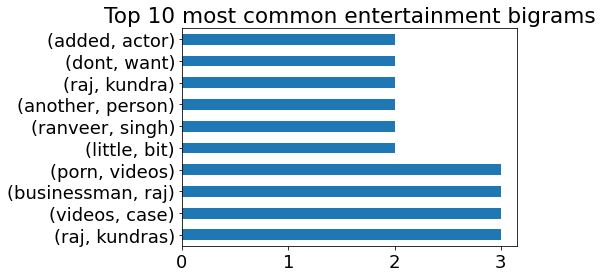

In [36]:
pd.Series(nltk.bigrams(entertain_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common entertainment bigrams')
None

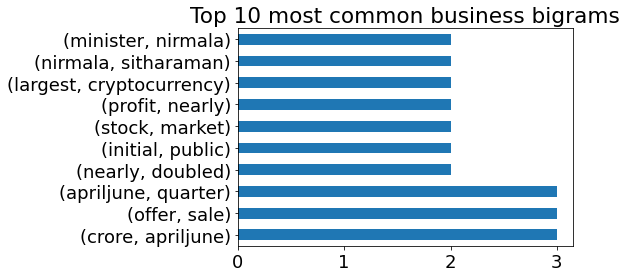

In [37]:
pd.Series(nltk.bigrams(business_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common business bigrams')
None

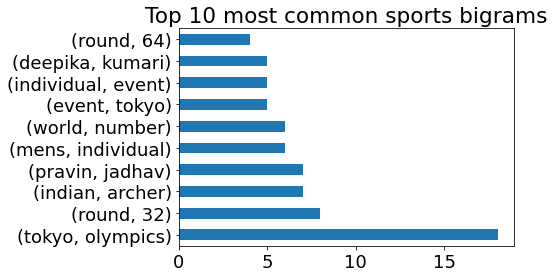

In [38]:
pd.Series(nltk.bigrams(sports_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common sports bigrams')
None

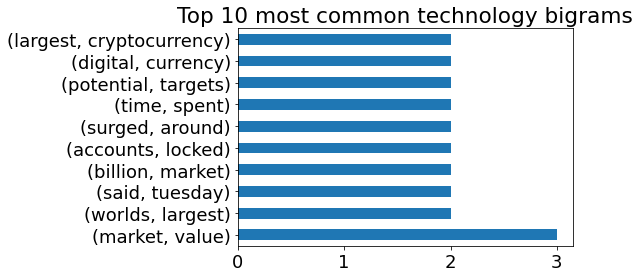

In [39]:
pd.Series(nltk.bigrams(technology_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common technology bigrams')
None

##### Trigrams

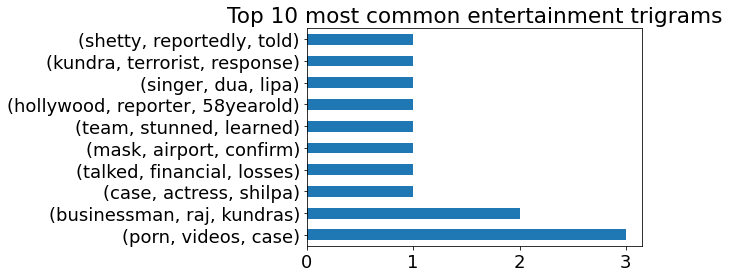

In [40]:
pd.Series(nltk.trigrams(entertain_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common entertainment trigrams')
None

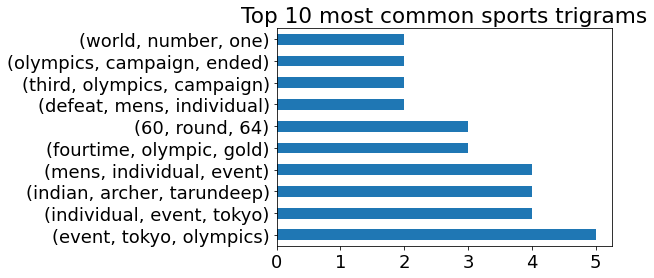

In [41]:
pd.Series(nltk.trigrams(sports_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common sports trigrams')
None

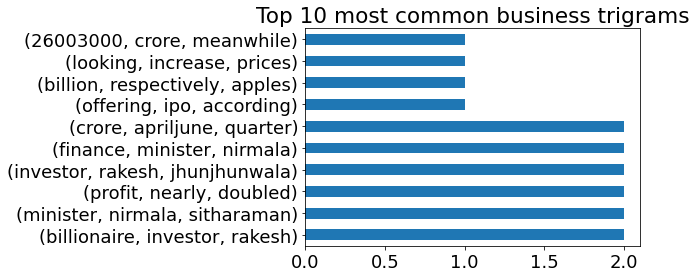

In [42]:
pd.Series(nltk.trigrams(business_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common business trigrams')
None

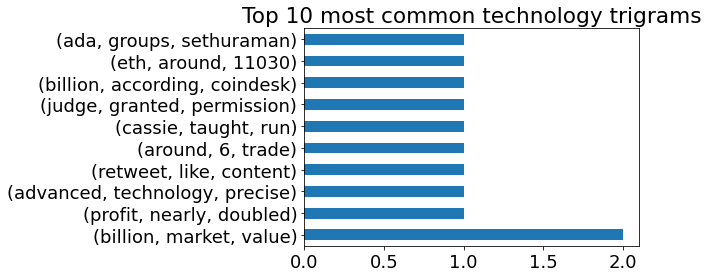

In [43]:
pd.Series(nltk.trigrams(technology_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common technology trigrams')
None

#### Word Clouds

In [44]:
## creating a series for the frequencies of the top 20 of all article categories

top_20_sports_bigrams = pd.Series(nltk.bigrams(sports_words.split()))\
.value_counts().head(20)

top_20_tech_bigrams = pd.Series(nltk.bigrams(technology_words.split()))\
.value_counts().head(20)

top_20_business_bigrams = pd.Series(nltk.bigrams(business_words.split()))\
.value_counts().head(20)

top_20_entertain_bigrams = pd.Series(nltk.bigrams(entertain_words.split()))\
.value_counts().head(20)

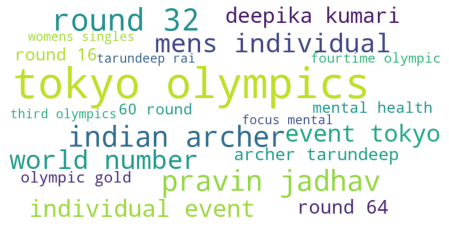

In [45]:
## using list comprehension to creat a dictionary of sports bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

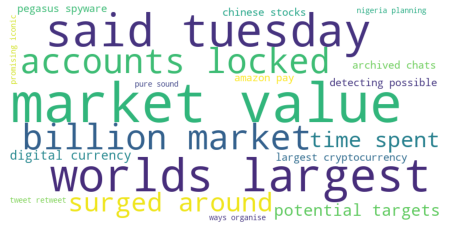

In [46]:
## using list comprehension to creat a dictionary of tech bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_tech_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

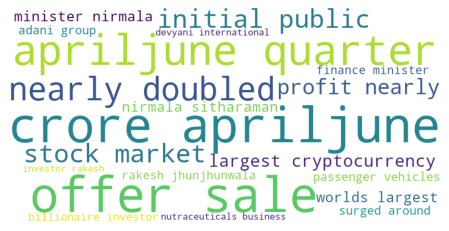

In [47]:
## using list comprehension to creat a dictionary of business bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_business_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

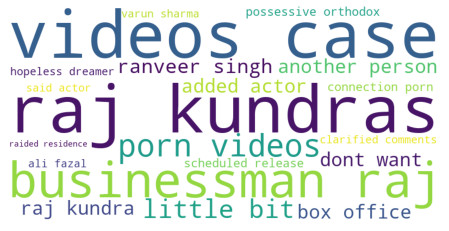

In [48]:
## using list comprehension to creat a dictionary of entertainment bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_entertain_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Codeup Articles

In [49]:
## making my list of articles

article_list = ['https://codeup.com/codeups-data-science-career-accelerator-is-here/',
                'https://codeup.com/data-science-myths/',
                'https://codeup.com/data-science-vs-data-analytics-whats-the-difference/',
                'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/',
                'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/'
                ]

In [50]:
## getting my article's and their content

articles_df = a.process_articles(article_list)

articles_df.head()

,Title,Content
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [51]:
articles_df = p.prep_content_columns(articles_df) ## using our prepare function

articles_df.head()

,Title,Content,Clean,Stemmed,Lemmatized
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,rumors true time arrived codeup officially ope...,rumor true time arriv codeup offici open appli...,rumor true time arrived codeup officially open...
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...,dimitri antoniou maggie giust data science big...,dimitri antoni maggi giust data scienc big dat...,dimitri antoniou maggie giust data science big...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",dimitri antoniou week ago codeup launched imme...,dimitri antoni week ago codeup launch immers d...,dimitri antoniou week ago codeup launched imme...
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair third biannual san antonio te...,sa tech job fair third biannual san antonio te...,sa tech job fair third biannual san antonio te...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps closing model danger prog...,competitor bootcamp close model danger program...,competitor bootcamps closing model danger prog...


#### Exploring Bigrams and Trigrams


In [52]:
## making a string for all of our article words

all_words = ' '.join(articles_df.Clean)

In [53]:
## making a series that is the frequency of the all the words used in the articles

all_freq = pd.Series(all_words.split()).value_counts()

In [54]:
all_freq.head() ## previewing our series

data        75
science     26
learning    20
machine     14
job         13
dtype: int64

In [55]:
## making our word count dataframe with an all column

word_counts = pd.DataFrame(all_freq)
word_counts.columns = ['all']

word_counts.head()

,all
data,75
science,26
learning,20
machine,14
job,13


In [56]:
## looking at the most common words

word_counts.sort_values('all', ascending=False).head(30)

,all
data,75
science,26
learning,20
machine,14
job,13
like,12
model,11
company,11
one,9
new,9


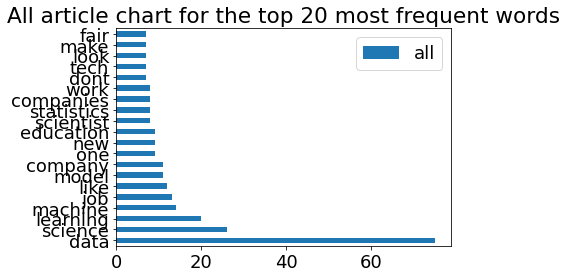

In [57]:
word_counts.sort_values('all', ascending=False).head(20).plot.barh()
plt.title('All article chart for the top 20 most frequent words')
None

#### Bigrams 

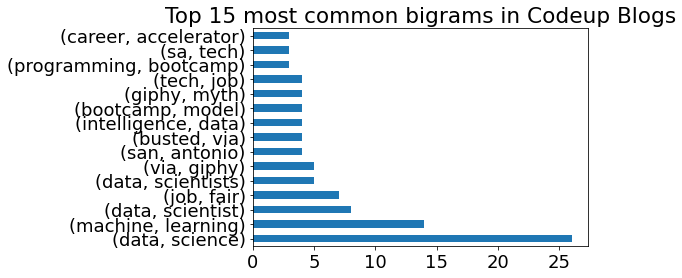

In [58]:
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(15).plot.barh()
plt.title('Top 15 most common bigrams in Codeup Blogs')
None

#### Trigrams

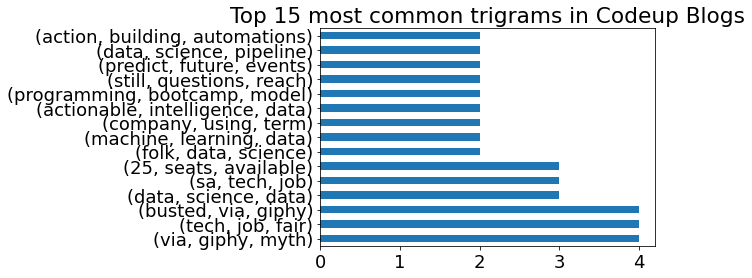

In [59]:
pd.Series(nltk.trigrams(all_words.split())).value_counts().head(15).plot.barh()
plt.title('Top 15 most common trigrams in Codeup Blogs')
None

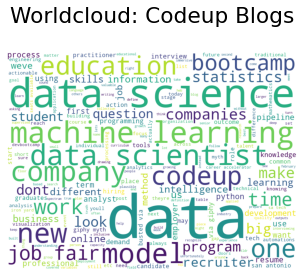

In [60]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off')
plt.title('Worldcloud: Codeup Blogs\n')
None

In [61]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS

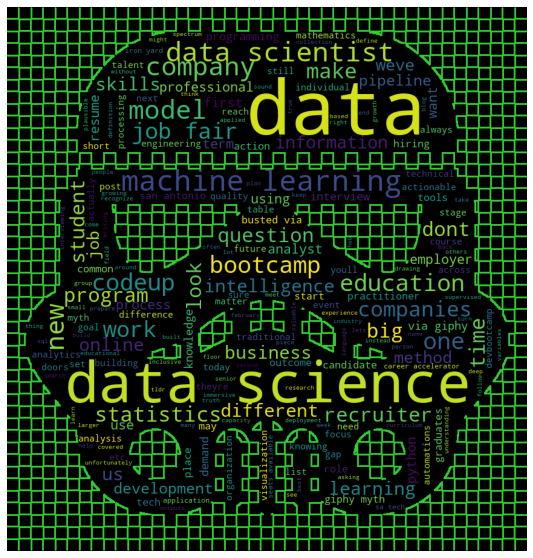

In [71]:
plt.figure(figsize = (20,10))
mask = np.array(Image.open('stormtrooper2.png'))
img = WordCloud(background_color = 'black', width = 2000, contour_width = 4,
                mask = mask, contour_color = '#32CD32')
img.generate(all_words)
plt.imshow(img)
plt.axis('off')
plt.show()